In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
df = pd.read_csv("data_to_ml.csv",sep=";",index_col=0)
df

,age,campaign,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_success
0,1.713663,-0.852852,no,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.818019,-0.852852,no,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,-0.269115,-0.852852,no,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.043955,-0.852852,no,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.713663,-0.852852,no,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0.046466,-0.852852,yes,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
41184,0.670095,-0.852852,no,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
41185,1.713663,-0.049670,no,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
41186,0.461382,-0.852852,yes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
algorithms = [LogisticRegression(),KNeighborsClassifier(n_neighbors=1),GaussianNB(),DecisionTreeClassifier(),RandomForestClassifier(),SVC()]
best_score=0
best_algorithm=None
X_best=None
k_best=0
for algorithm in algorithms:
    ks = [ x for x in range(1,41)]
    scores= []
    X_alg=[]
    for i in ks:
        print(f"{algorithm} {i} of {len(ks)}")
        X = df.drop(columns="y")
        y = df.y

        X = SelectKBest(f_classif,k=i,feature_importances_=).fit_transform(X,y)
        X_alg.append(X)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        
        classifier = algorithm
        
        classifier.fit(X_train,y_train)
        y_pred =classifier.predict(X_test)
        scores.append(classification_report(y_test,y_pred,output_dict=True)["accuracy"])
    
    max_score = max(scores)
    max_score_index = scores.index(max_score)
    X_max = X_alg[max_score_index]
    k_max = ks[max_score_index]
    if max_score > best_score:
        best_score=max_score
        X_best = X_max
        k_best=k_max
        best_algorithm = algorithm
    
print(best_algorithm)
print(best_score)
print(k_best)


LogisticRegression() 1 of 40


TypeError: __init__() got an unexpected keyword argument 'k'

In [20]:
new_df= pd.DataFrame(X_best)
new_df=pd.concat([new_df,y],axis=1)
new_df


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,y
0,1.713663,-0.852852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,no
1,1.818019,-0.852852,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,no
2,-0.269115,-0.852852,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,no
3,0.043955,-0.852852,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,no
4,1.713663,-0.852852,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0.046466,-0.852852,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,yes
41184,0.670095,-0.852852,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,no
41185,1.713663,-0.049670,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,no
41186,0.461382,-0.852852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,yes


In [21]:
new_df.to_csv("data_to_ml_feat_sel.csv",sep=";")

<Axes: xlabel='PC1', ylabel='PC2'>

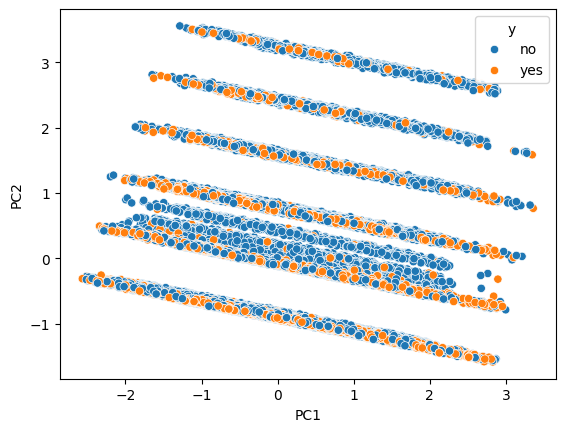

In [15]:
from sklearn.decomposition import PCA
principal = PCA(n_components=2)
principal.fit(new_df.drop(columns=["y"]),new_df["y"])
x= principal.transform(new_df.drop(columns=["y"]))
x_y=pd.DataFrame({"PC1":x[:,0],"PC2":x[:,1],"y":new_df.y})

sns.scatterplot(x="PC1",y="PC2",data=x_y,hue="y")

In [ ]:
x_y.to_csv("data_to_ml_feat_sel_pca.csv",sep=";")